In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load Data

In [2]:
df = pd.read_csv('../data/data_visual.csv',sep=',')
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_group,contact_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.350000,1,-1,0,unknown,no,employee,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.516667,1,-1,0,unknown,no,employee,unknown


# Detailed Column Description

**Bank client data:**
<br>
1. `age` (numeric)
2. `job` : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
3. `marital` : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. `education` (categorical: "unknown","secondary","primary","tertiary")
5. `default`: has credit in default? (binary: "yes","no")
6. `balance`: average yearly balance, in euros (numeric)
7. `housing`: has housing loan? (binary: "yes","no")
8. `loan`: has personal loan? (binary: "yes","no")
<br>
**Related with the last contact of the current campaign:**
<br>
1. `contact`: contact communication type (categorical: "unknown","telephone","cellular")
2. `day`: last contact day of the month (numeric)
3. `month`: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
4. `duration`: last contact duration, in seconds (numeric)
<br>
**Other attributes:**
1. `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)
2. `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
3. `previous`: number of contacts performed before this campaign and for this client (numeric)
4. `poutcome`: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
<br>
**Output variable (desired target):**<br>
`y` - has the client subscribed a term deposit? (binary: "yes","no")

In [3]:
df['y_num'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [4]:
list_balgroup = []

for i, x in df.iterrows():
    if x['balance'] <= 0 :
        balgroup = '<= 0'
    elif x['balance'] >=1 and x['balance'] <= 286 :
        balgroup = '1 - 286'    
    elif x['balance'] >=287 and x['balance'] <= 572 :
        balgroup = '287 - 572'    
    elif x['balance'] >=573 and x['balance'] <= 857 :
        balgroup = '573 - 857'    
    elif x['balance'] >=858 and x['balance'] <= 1142 :
        balgroup = '858 - 1142'        
    elif x['balance'] >=1143 and x['balance'] <= 1427 :
        balgroup = '1143 - 1427'   
    elif x['balance'] >= 1428   :
        balgroup = '>= 1428'
        
        
    else:
        balgroup = 'unknown'
    list_balgroup.append(balgroup)

df['balgroup'] = list_balgroup

In [5]:
list_agegroup = []

for i, x in df.iterrows():
    if x['age'] >= 18 and x['age'] <= 33:
        agegroup = '18 - 33'
    elif x['age'] >= 34 and x['age'] <= 49:
        agegroup = '34 - 49'
    elif x['age'] >= 50 and x['age'] <= 65:
        agegroup = '50 - 65'
    elif x['age'] >= 66 and x['age'] <= 81:
        agegroup = '66 - 81'      
    elif x['age'] >= 82 and x['age'] <= 97:
        agegroup = '82 - 97'

    list_agegroup.append(agegroup)

df['age_group'] = list_agegroup

# EDA

## Numerical Data

In [6]:
num_dtypes = ['int16','int32','int64','float16','float32','float64']

num_df = df.select_dtypes(include=num_dtypes)
numericals = num_df.columns

print(numericals)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y_num'],
      dtype='object')


In [7]:
num_df.describe()

,age,balance,day,duration,campaign,pdays,previous,y_num
count,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000
mean,40.936469,1362.331483,15.806220,4.302552,2.763881,40.171349,0.580012,0.116954
std,10.618553,3044.904583,8.322483,4.291986,3.098164,100.087799,2.303257,0.321368
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,1.716667,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,5.316667,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,81.966667,63.000000,871.000000,275.000000,1.000000


## Outlier (Distribution of the numerical data)

Almost all numerical data are not normally distributed. Removing outliers from this data is quite risky because of the large amount of it.

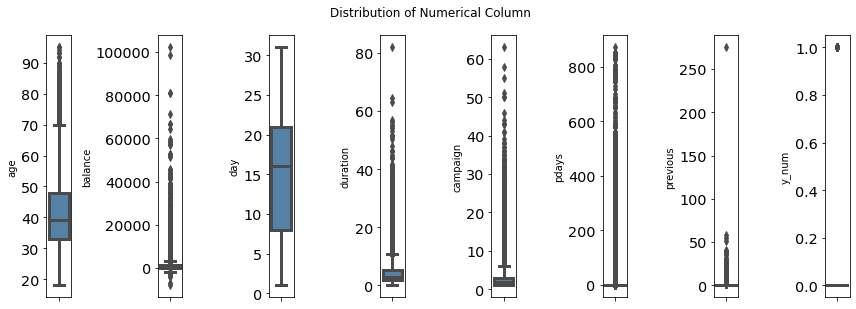

In [8]:
num_dtypes = ['int16','int32','int64','float16','float32','float64']
num_df = df.select_dtypes(include=num_dtypes)
numericals = num_df.columns

for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='steelblue', orient='v')
    plt.tight_layout()


plt.title('Distribution of Numerical Column', x=-16, y=1.05);

## Categorical Data

In [9]:
cat_dtypes = ['object']

cat_df = df.select_dtypes(include=cat_dtypes)
categoricals = cat_df.columns

print(categoricals)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y', 'job_group', 'contact_group', 'balgroup',
       'age_group'],
      dtype='object')


In [10]:
cat_df.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y,job_group,contact_group,balgroup,age_group
count,45206,45206,45206,45206,45206,45206,45206,45206,45206,45206,45206,45206,45206,45206
unique,12,3,3,2,2,2,3,12,4,2,6,2,7,5
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no,employee,phone,>= 1428,34 - 49
freq,9732,27211,25056,44391,25128,37964,29280,13766,36954,39919,26664,32186,11303,21932


## Target (Conversion Rate of Campaign)

Target `y` represents the number of customers who opened deposit accounts (conversion rate). Conversion rate of this campaign is around 12%.

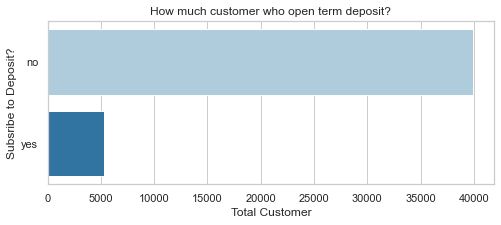

In [11]:
sns.set(rc={'figure.figsize':(8,3)}, font_scale=1, style='whitegrid')
sns.countplot(data=df, y='y', palette='Paired')
plt.xlabel("Total Customer")
plt.ylabel("Subsribe to Deposit?")
plt.title('How much customer who open term deposit?');

## Customer Personal Data

### Age

Customers are dominated by people who are in their productive age, around 30-50. The number of customers who open deposit accounts for ages between 18 and 50 is not too far off, with most customers being in their 30-50.

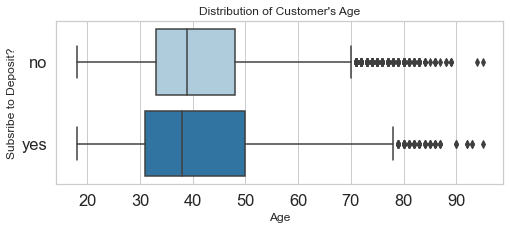

In [12]:
sns.set(rc={'figure.figsize':(8,3)}, font_scale=1.5, style='whitegrid')
sns.boxplot(data=df, x="age", y="y", order = df["y"].value_counts().index, palette='Paired')
plt.xlabel("Age", fontsize = 12)
plt.ylabel("Subsribe to Deposit?", fontsize = 12)
plt.title('Distribution of Customer\'s Age', fontsize=12);

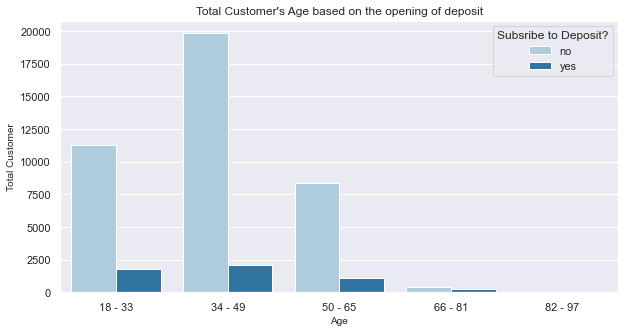

In [13]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
job = sns.countplot(x="age_group", data = df, hue = "y", palette='Paired', order = ['18 - 33', '34 - 49', '50 - 65','66 - 81', '82 - 97'])
plt.title('Total Customer\'s Age based on the opening of deposit')
plt.xlabel("Age", fontsize = 10)
plt.ylabel("Total Customer", fontsize = 10)
plt.legend(title='Subsribe to Deposit?');

### Job Group

Based on the proportion, customers who do not have an active income, such as 'student', 'retired' and 'unemployed', are more likely to open a deposit account. However, the number of those customers tends to be small compared to the number of customers who have active income. The highest number of customers who have active income and open deposit accounts are those who have jobs as 'employee'

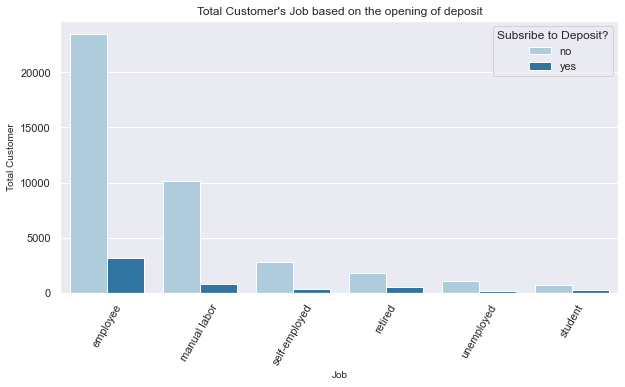

In [14]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
job = sns.countplot(x="job_group", data = df, hue = "y", order = df["job_group"].value_counts().index, palette="Paired")
job.tick_params(axis='x', rotation=60)
plt.title('Total Customer\'s Job based on the opening of deposit')
plt.xlabel("Job", fontsize = 10)
plt.ylabel("Total Customer", fontsize = 10)
plt.legend(title='Subsribe to Deposit?');

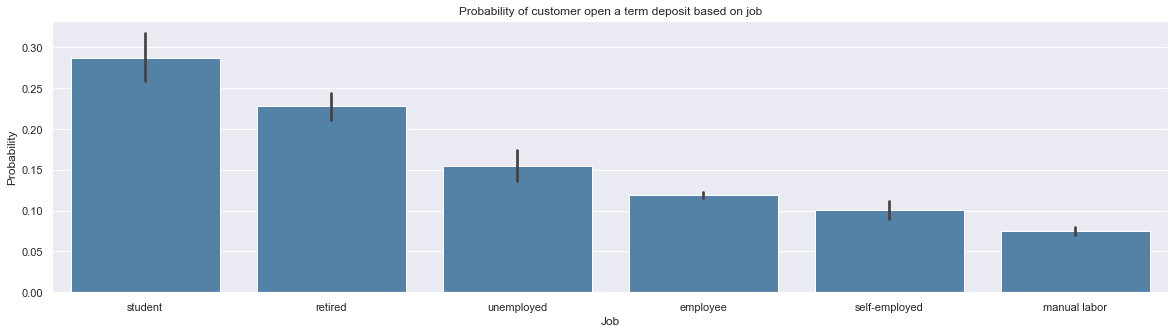

In [15]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
plt.figure( figsize = (20, 5))
sns.barplot(data = df, x = 'job_group', y = 'y_num', color='steelblue', order=['student', 'retired', 'unemployed', 'employee', 'self-employed', 'manual labor'])
plt.xlabel("Job", fontsize = 12)
plt.ylabel("Probability", fontsize = 12)
plt.title('Probability of customer open a term deposit based on job');

### Marital

Customers who have dependents tend to not open an account but the greatest number of customers is who have dependents/married.

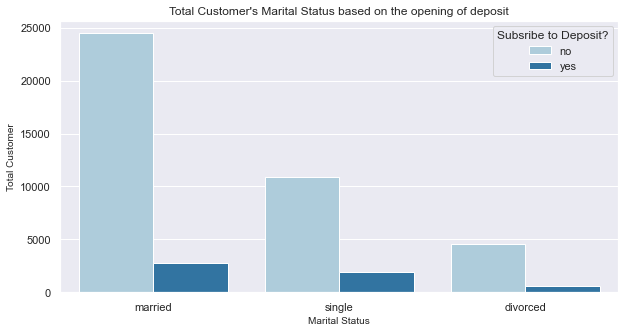

In [16]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
marital = sns.countplot(x="marital", data = df, hue = "y", order = df["marital"].value_counts().index, palette="Paired")
plt.title('Total Customer\'s Marital Status based on the opening of deposit')
plt.xlabel("Marital Status", fontsize = 10)
plt.ylabel("Total Customer", fontsize = 10)
plt.legend(title='Subsribe to Deposit?');

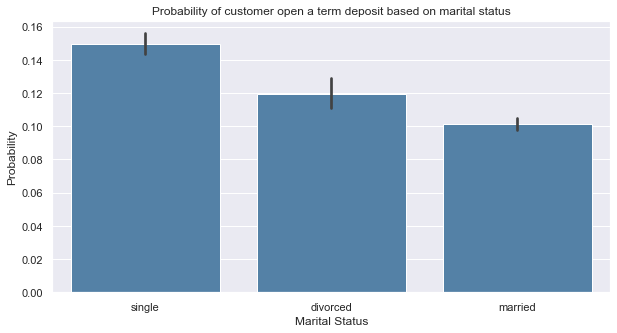

In [17]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
sns.barplot(data = df, x = 'marital', y = 'y_num', color='steelblue', order=['single', 'divorced', 'married'])
plt.xlabel("Marital Status", fontsize = 12)
plt.ylabel("Probability", fontsize = 12)
plt.title('Probability of customer open a term deposit based on marital status');

### Education

Customers with `education` 'secondary' and 'tertiary' have the same numbers of opening deposit account, with 'tertiary' have higher conversion rate.

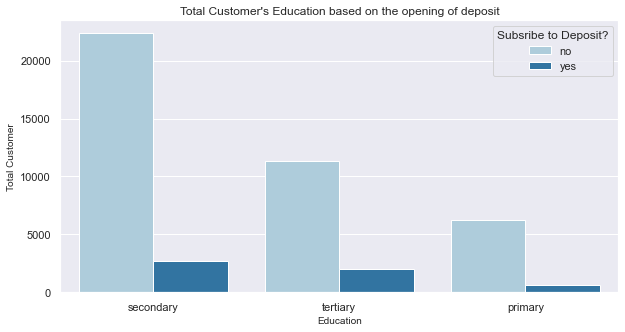

In [18]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
sns.countplot(x="education", data = df, hue = "y", order = df["education"].value_counts().index, palette="Paired")
plt.title('Total Customer\'s Education based on the opening of deposit')
plt.xlabel("Education", fontsize = 10)
plt.ylabel("Total Customer", fontsize = 10)
plt.legend(title='Subsribe to Deposit?');

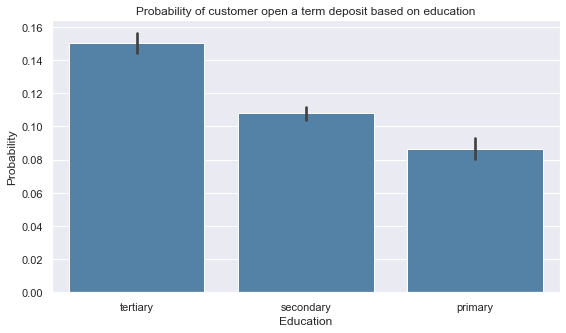

In [19]:
plt.figure( figsize = (20, 5))
plt.subplot(121)
sns.barplot(data = df, x = 'education', y = 'y_num', color='steelblue')
plt.xlabel("Education", fontsize = 12)
plt.ylabel("Probability", fontsize = 12)
plt.title('Probability of customer open a term deposit based on education');

## Customer Bank Transaction Data

### Loan - Default - Housing

`loan`, `default`, and `housing` are features that describe the condition of customer's debt to the bank. From these three features, it shows that customers who do not have a `default`, `housing`, or `loan` tend to open a deposit account.

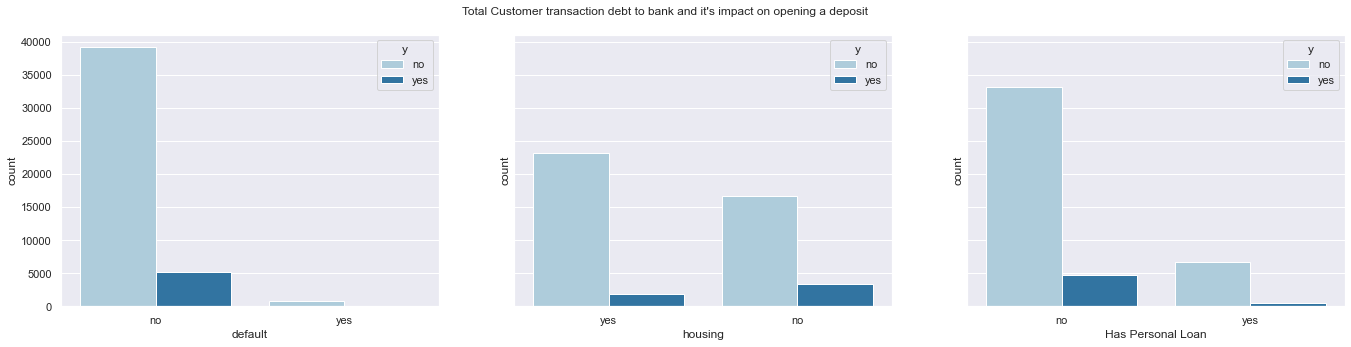

In [20]:
fig, ax = plt.subplots(1,3,figsize=(23, 5), sharey=True)

sns.countplot(data=df, x='default', hue='y', ax = ax[0], palette='Paired')
plt.xlabel("Has Credit in Default", fontsize = 12)

sns.countplot(data=df, x = 'housing', hue = 'y', ax = ax[1], palette='Paired')
plt.title('Total Customer transaction debt to bank and it\'s impact on opening a deposit', x=-0.8, y=1.05)
plt.xlabel("Has Housing Loan", fontsize = 12)

sns.countplot(data=df, x = 'loan', hue = 'y', ax = ax[2], palette='Paired')
plt.xlabel("Has Personal Loan", fontsize = 12);

### Balance

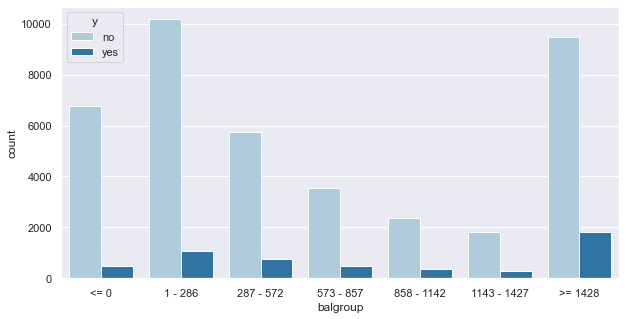

In [21]:
sns.countplot(data=df, x='balgroup', hue='y', palette='Paired', order=['<= 0', '1 - 286', '287 - 572', '573 - 857', '858 - 1142', '1143 - 1427', '>= 1428']);

## Customer Contact Campaign

### Contact

Customers that have been contacted personally with team marketing tend to open a deposit account. Customer that have been contacted with 'cellular' have more in numbers because it is easier to contact people by phone cellular than telephone. When viewed from the proportion between those who open and not open accounts from customers with `contact` 'cellular' and 'telephone', the number between the two is not different. Thus, it can be said that, whether customers are contacted with 'cellular' or 'telephone' did not have any impact on the conversion rate.

<AxesSubplot:xlabel='contact', ylabel='count'>

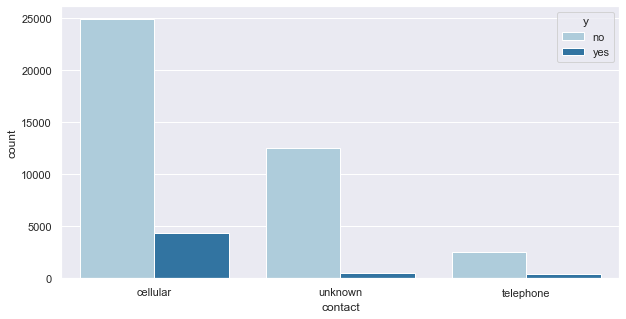

In [22]:
sns.countplot(data=df, x='contact', hue = 'y', palette='Paired', order = df["contact"].value_counts().index)

Text(0, 0.5, 'Probability')

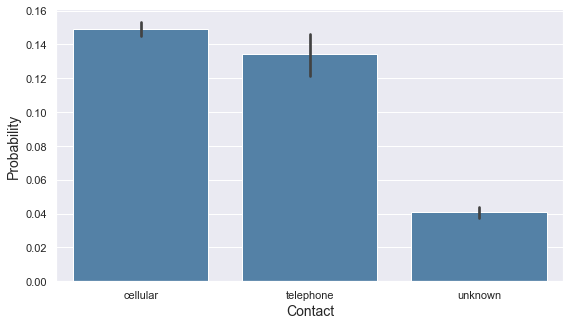

In [23]:
plt.figure( figsize = (20, 5))
plt.subplot(121)
sns.barplot(data = df, x = 'contact', y = 'y_num', color='steelblue', order=['cellular', 'telephone', 'unknown'])
plt.xlabel("Contact", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)

### Duration

In [24]:
df_duration = df.loc[(df['duration']>0) & (df['duration']<15)]

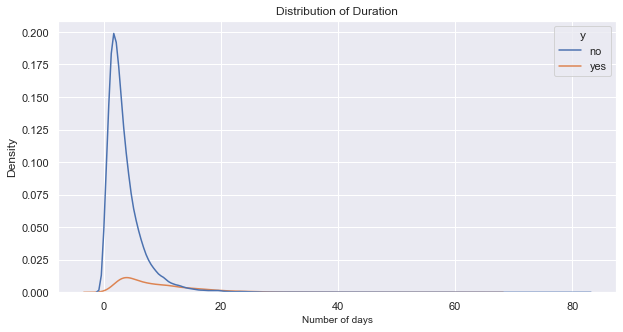

In [25]:
sns.kdeplot(data=df, x='duration', hue='y')

plt.title('Distribution of Duration')
plt.xlabel('Number of days',fontsize=10);

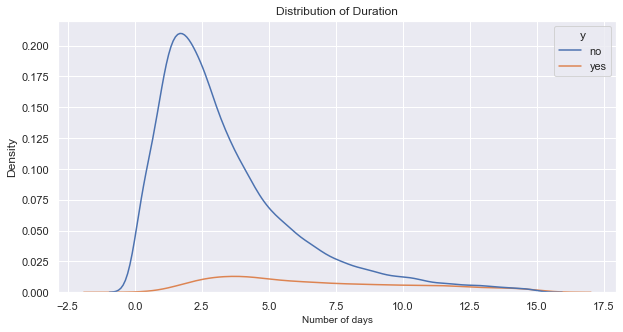

In [26]:
sns.kdeplot(data=df_duration, x='duration', hue='y')

plt.title('Distribution of Duration')
plt.xlabel('Number of days',fontsize=10);

### Month

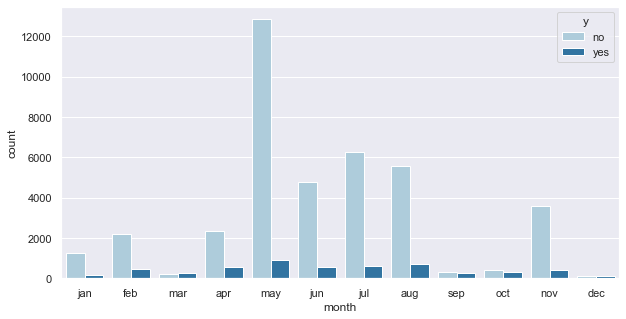

In [27]:
order_month = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sns.countplot(data = df, x = 'month', hue = 'y', order = order_month, palette='Paired');

### Day

In [28]:
df_md = df.copy()

def day_month(x):
    if x <= 10:
        group = 'beginning'
    elif x <= 20:
        group = 'middle'
    else:
        group = 'end'
    return group

df_md['day_month']=df_md.apply(lambda x: day_month(x['day']),axis=1)

df_md = df_md.groupby(['month', 'day_month', 'y'])['job'].count().reset_index()
df_md.columns = ['month', 'day_month', 'y', 'count']

In [29]:
def no_month(x):
    if x == 'jan':
        no_ = 1
    elif x == 'feb':
        no_ = 2
    elif x == 'mar':
        no_ = 3
    elif x == 'apr':
        no_ = 4
    elif x == 'may':
        no_ = 5
    elif x == 'jun':
        no_ = 6
    elif x == 'jul':
        no_ = 7
    elif x == 'aug':
        no_ = 8
    elif x == 'sep':
        no_ = 9
    elif x == 'oct':
        no_ = 10
    elif x == 'nov':
        no_ = 11
    else:
        no_ = 'dec'
    return no_

def no_day(x):
    if x == 'beginning':
        no_ = 1
    elif x == 'middle':
        no_ = 2
    else:
        no_ = 3
    return no_

df_md['month_no']=df_md.apply(lambda x: no_month(x['month']),axis=1)
df_md['day_no']=df_md.apply(lambda x: no_day(x['day_month']),axis=1)

df_sorted = df_md.sort_values( ['month_no', 'day_no'] , ascending=True).reset_index()
df_sorted.drop('index', axis=1, inplace=True)
df_sorted['day_of_month']=df_sorted.apply(lambda x: x['month'] + ' ' + x['day_month'],axis=1)
df_sorted

,month,day_month,y,count,month_no,day_no,day_of_month
0,jan,beginning,no,8,1,1,jan beginning
1,jan,beginning,yes,3,1,1,jan beginning
2,jan,middle,no,49,1,2,jan middle
3,jan,middle,yes,55,1,2,jan middle
4,jan,end,no,1204,1,3,jan end
...,...,...,...,...,...,...,...
67,dec,beginning,yes,46,dec,1,dec beginning
68,dec,middle,no,28,dec,2,dec middle
69,dec,middle,yes,22,dec,2,dec middle
70,dec,end,no,33,dec,3,dec end


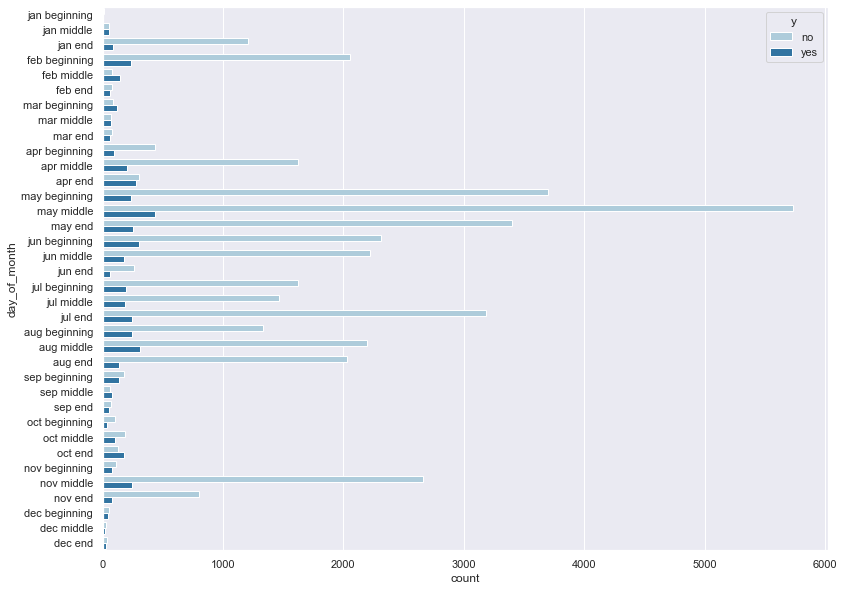

In [30]:
plt.figure(figsize = (13, 10))
sns.barplot(data = df_sorted, x= 'count', y = 'day_of_month', hue = 'y', palette='Paired');

### Campaign (No of contacts performed)

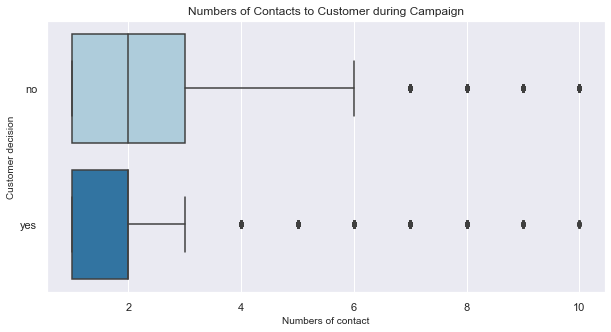

In [31]:
df_campaign = df.loc[df['campaign']<=10] ## Untuk lebih lihat detil sebaran keputusan customer, karena mayoritas yang membuka dihubungi <10 kali

sns.boxplot(data=df_campaign, x='campaign', y='y', palette='Paired')
plt.title('Numbers of Contacts to Customer during Campaign')
plt.xlabel('Numbers of contact',fontsize=10)
plt.ylabel('Customer decision',fontsize=10);

## Customer Previous Campaign

### Pdyas (Number of Days Last Contact)

In [32]:
pdays_clean = df.loc[df['pdays']!=-1] ## Exclude orang-orang yang belum pernah dikontak sebelumnya
pdays_yes = pdays_clean.loc[pdays_clean['y']=='yes']
pdays_no = pdays_clean.loc[pdays_clean['y']=='no']

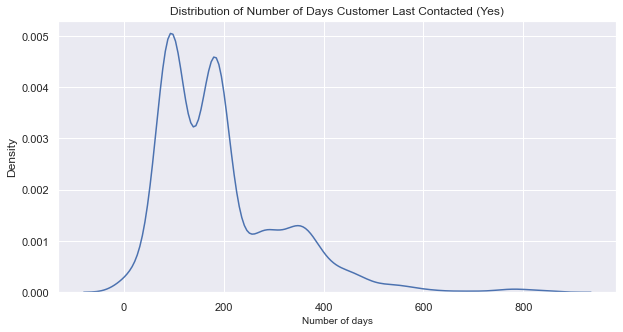

In [33]:
sns.kdeplot(data=pdays_yes, x='pdays', palette='Paired')

plt.title('Distribution of Number of Days Customer Last Contacted (Yes)')
plt.xlabel('Number of days',fontsize=10);

### Previous (Number of Contacts Performed)

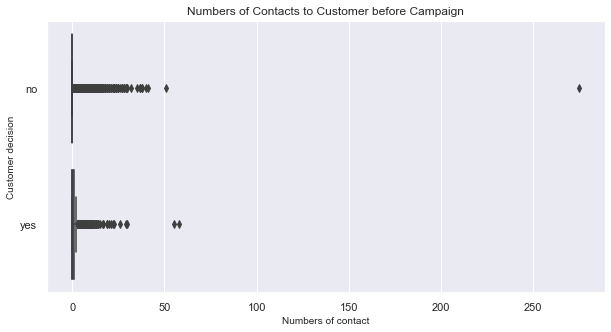

In [34]:
sns.boxplot(data=df, x='previous', y='y', palette='Paired')

plt.title('Numbers of Contacts to Customer before Campaign')
plt.xlabel('Numbers of contact',fontsize=10)
plt.ylabel('Customer decision',fontsize=10);

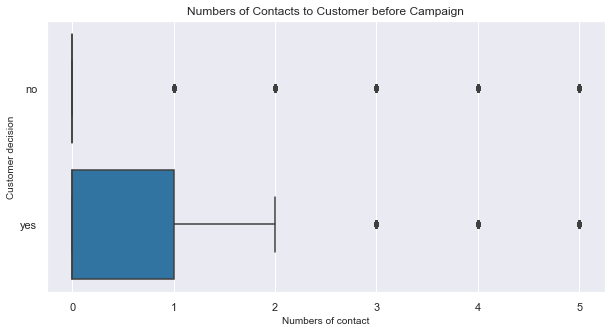

In [35]:
previous_vis = df.loc[df['previous']<=5] ##Untuk melihat lebih rinci sebaran customer pada kategori yes

sns.boxplot(data=previous_vis, x='previous', y='y', palette='Paired')

plt.title('Numbers of Contacts to Customer before Campaign')
plt.xlabel('Numbers of contact',fontsize=10)
plt.ylabel('Customer decision',fontsize=10);

### Poutcome (Outcome)

`poutcome` dominated with 'unknown' values, means bank tend to contact new customers who never been exposed to another campaign. However, when viewed from proportion, customers who `success` in previous campaign tend to open an account for this campaign, means customers are satisfied with the product and more likely to subsribe to the next campaign. 

<AxesSubplot:xlabel='poutcome', ylabel='count'>

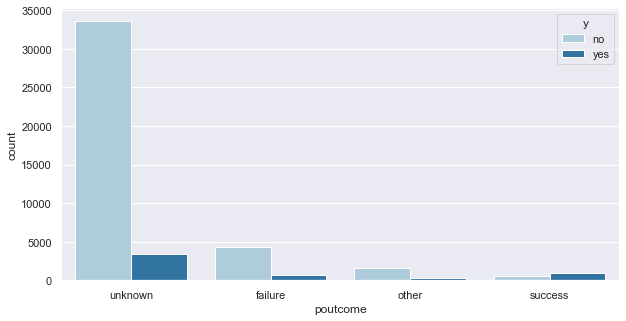

In [36]:
sns.countplot(data=df, x='poutcome', hue = 'y', palette='Paired', order = df["poutcome"].value_counts().index)

Text(0, 0.5, 'Probability')

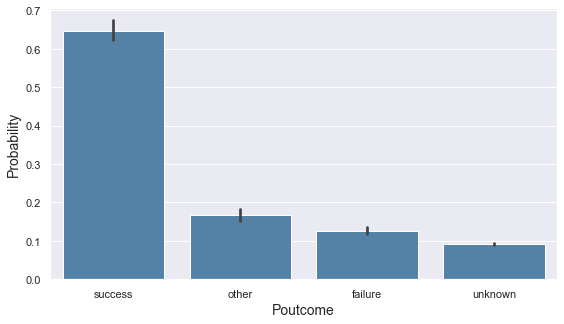

In [37]:
plt.figure( figsize = (20, 5))
plt.subplot(121)
sns.barplot(data = df, x = 'poutcome', y = 'y_num', color='steelblue', order=['success', 'other', 'failure', 'unknown'])
plt.xlabel("Poutcome", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)